In [1]:
import pandas as pd
import yfinance as yf
from pypfopt import EfficientFrontier, plotting

In [2]:
# ticker list
tickers = ["GLD","SPY","IEF","QQQ","DBC"]

In [5]:
# fetch data
data = yf.download(tickers,start="2015-01-01",end="2025-01-01",auto_adjust=False)["Adj Close"]
returns=data.pct_change().dropna()

[*********************100%***********************]  5 of 5 completed


In [7]:
# compute stats 
mean_returns = returns.mean()
cov_matrix = returns.cov()
corr = returns.corr()
print("Correlation Matrix:\n", corr)

Correlation Matrix:
 Ticker       DBC       GLD       IEF       QQQ       SPY
Ticker                                                  
DBC     1.000000  0.253671 -0.128756  0.264073  0.348849
GLD     0.253671  1.000000  0.390269  0.056422  0.046814
IEF    -0.128756  0.390269  1.000000 -0.113615 -0.167987
QQQ     0.264073  0.056422 -0.113615  1.000000  0.929276
SPY     0.348849  0.046814 -0.167987  0.929276  1.000000


In [9]:
# optimize portfolio
ef = EfficientFrontier(mean_returns, cov_matrix)
weights = ef.max_sharpe()
cleaned = ef.clean_weights()
ef.portfolio_performance(verbose=True)
print("optimized weights:", cleaned)


Expected annual return: 0.1%
Annual volatility: 0.8%
Sharpe Ratio: 0.07
optimized weights: OrderedDict({'DBC': 0.0, 'GLD': 0.50253, 'IEF': 0.00085, 'QQQ': 0.49661, 'SPY': 0.0})


<Axes: xlabel='Volatility', ylabel='Return'>

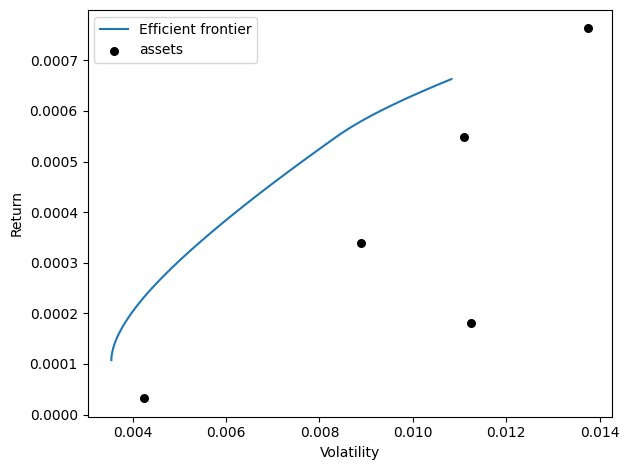

In [12]:
# visualize results
# Re-create EfficientFrontier instance for plotting
ef_plot = EfficientFrontier(mean_returns, cov_matrix)
plotting.plot_efficient_frontier(ef_plot, show_assets=True)

Expected annual return: 0.1%
Annual volatility: 0.8%
Sharpe Ratio: 0.07
OrderedDict({'DBC': 0.0, 'GLD': 0.50253, 'IEF': 0.00085, 'QQQ': 0.49661, 'SPY': 0.0})


<Axes: xlabel='Volatility', ylabel='Return'>

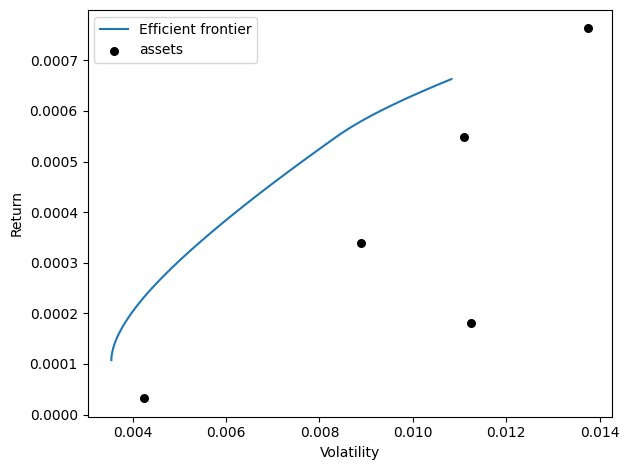

In [13]:
# 5. Run optimization on a *separate* instance
ef_opt = EfficientFrontier(mean_returns, cov_matrix)
weights = ef_opt.max_sharpe()
cleaned = ef_opt.clean_weights()
ef_opt.portfolio_performance(verbose=True)
print(cleaned)
# visualize results
ef_plot = EfficientFrontier(mean_returns, cov_matrix)
plotting.plot_efficient_frontier(ef_plot, show_assets=True)
